In [1]:
import math ,copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("ChatsData.csv")

In [3]:
data.head()

,Message 1,Message 2,Response,M1 Send Time,M2 Receive Time,Number of Words (M1),Number of Punctuation (M1),Presence of Emojis (M1),Presence of Images (M1),Presence of Videos (M1),Presence of Links (M1),Number of Words (M2),Number of Punctuation (M2),Presence of Emojis (M2),Presence of Images (M2),Presence of Videos (M2),Presence of Links (M2)
0,I'm going to learn how to bake a chocolate cak...,Baking a chocolate cake is delicious! What's y...,No,11/8/2023 21:45,11/8/2023 21:50,8,3,Yes,No,No,No,9,3,Yes,No,No,No
1,I'm planning a weekend getaway by the lake. 🌅,Weekend getaways by the lake are so relaxing! ...,No,11/8/2023 21:50,11/8/2023 21:55,8,3,Yes,No,No,No,8,3,Yes,No,No,No
2,I'm going to a rock music concert. 🎸,Rock concerts are energetic! Which rock band a...,No,11/8/2023 21:55,11/8/2023 22:00,6,3,Yes,No,No,No,9,3,Yes,No,No,No
3,I'm planning a day at the beach with my family...,Beach days with family are fun! What beach act...,No,11/8/2023 22:00,11/8/2023 22:05,8,3,Yes,No,No,No,8,3,Yes,No,No,No
4,I'm going to start a new workout routine. 💪,Starting a new workout routine is great for yo...,No,11/8/2023 22:05,11/8/2023 22:10,7,3,Yes,No,No,No,9,3,Yes,No,No,No


In [4]:
df = data.copy()

In [5]:
data.columns

Index(['Message 1', 'Message 2', 'Response', 'M1 Send Time', 'M2 Receive Time',
       'Number of Words (M1)', 'Number of Punctuation (M1)',
       'Presence of Emojis (M1)', 'Presence of Images (M1)',
       'Presence of Videos (M1)', 'Presence of Links (M1)',
       'Number of Words (M2)', 'Number of Punctuation (M2)',
       'Presence of Emojis (M2)', 'Presence of Images (M2)',
       'Presence of Videos (M2)', 'Presence of Links (M2)'],
      dtype='object')

In [6]:
data.rename(columns={'Message 1': 'M1',
                   'Message 2': 'M2',
                   'M1 Send Time': 'SendTime', 
                   'M2 Receive Time': 'RecTime',
                   'Number of Words (M1)': 'WC-M1',
                   'Number of Punctuation (M1)': 'PC-M1',
                   'Presence of Emojis (M1)':'EC-M1',
                   'Presence of Images (M1)':'IC-M1',
                   'Presence of Videos (M1)':'VC-M1',
                   'Presence of Links (M1)':'LC-M1',
                   'Number of Words (M2)':'WC-M2',
                   'Number of Punctuation (M2)':'PC-M2',
                   'Presence of Emojis (M2)':'EC-M2',
                   'Presence of Images (M2)':'IC-M2',
                   'Presence of Videos (M2)':'VC-M2',
                   'Presence of Links (M2)':'LC-M2'
                  }, inplace=True)


In [7]:
data.head()

,M1,M2,Response,SendTime,RecTime,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2
0,I'm going to learn how to bake a chocolate cak...,Baking a chocolate cake is delicious! What's y...,No,11/8/2023 21:45,11/8/2023 21:50,8,3,Yes,No,No,No,9,3,Yes,No,No,No
1,I'm planning a weekend getaway by the lake. 🌅,Weekend getaways by the lake are so relaxing! ...,No,11/8/2023 21:50,11/8/2023 21:55,8,3,Yes,No,No,No,8,3,Yes,No,No,No
2,I'm going to a rock music concert. 🎸,Rock concerts are energetic! Which rock band a...,No,11/8/2023 21:55,11/8/2023 22:00,6,3,Yes,No,No,No,9,3,Yes,No,No,No
3,I'm planning a day at the beach with my family...,Beach days with family are fun! What beach act...,No,11/8/2023 22:00,11/8/2023 22:05,8,3,Yes,No,No,No,8,3,Yes,No,No,No
4,I'm going to start a new workout routine. 💪,Starting a new workout routine is great for yo...,No,11/8/2023 22:05,11/8/2023 22:10,7,3,Yes,No,No,No,9,3,Yes,No,No,No


In [8]:
data.columns

Index(['M1', 'M2', 'Response', 'SendTime', 'RecTime', 'WC-M1', 'PC-M1',
       'EC-M1', 'IC-M1', 'VC-M1', 'LC-M1', 'WC-M2', 'PC-M2', 'EC-M2', 'IC-M2',
       'VC-M2', 'LC-M2'],
      dtype='object')

In [9]:
df = data.drop(['M1','M2'], axis =1)

In [10]:
df['EC-M1'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['IC-M1'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['VC-M1'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['LC-M1'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['EC-M2'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['IC-M2'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['VC-M2'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['LC-M2'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['Response'] = df['Response'].replace({'Yes':1,'No':0})

In [11]:
df1= df.copy()

In [12]:
df1['SendTime'] = pd.to_datetime(df1['SendTime'])
df1['RecTime'] = pd.to_datetime(df1['RecTime'])

# Calculate the time difference in minutes
df1['RespTime'] = (df1['RecTime'] - df1['SendTime']).dt.total_seconds() / 60


In [13]:
df1.drop(['SendTime','RecTime'],axis=1,inplace=True)

In [14]:
df1.head()

,Response,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2,RespTime
0,0,8,3,1,1,1,1,9,3,1,1,1,1,5.0
1,0,8,3,1,1,1,1,8,3,1,1,1,1,5.0
2,0,6,3,1,1,1,1,9,3,1,1,1,1,5.0
3,0,8,3,1,1,1,1,8,3,1,1,1,1,5.0
4,0,7,3,1,1,1,1,9,3,1,1,1,1,5.0


In [15]:
# val = np.abs(np.random.rand(1))
df1['RT'] = df1.RespTime * (np.random.rand(219))

In [16]:
df1.RT

0      2.435028
1      3.902938
2      2.816835
3      2.609354
4      4.529637
         ...   
214    4.122171
215    1.800335
216    3.759831
217    1.426997
218    0.269304
Name: RT, Length: 219, dtype: float64

In [17]:
df1.RT.value_counts()

2.435028    1
1.922244    1
4.037720    1
0.812292    1
0.392186    1
           ..
1.993366    1
3.279761    1
4.773051    1
4.098079    1
0.269304    1
Name: RT, Length: 219, dtype: int64

In [18]:
X = df1.drop(['Response'],axis=1)
y = df1['Response']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [21]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    g = 1/(1 + np.exp(-z))
    return g

In [28]:
# Gradient Descent
def gradientDescent(X, y, w, b, lr, itr):
    J_history = []
    
    for i in range(itr):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)
        error = y_hat - y
        dw = np.dot(X.T, error) / len(X)
        db = np.sum(error) / len(X)
        
        w -= lr * dw
        b -= lr * db
        
        cost = -1 / len(X) * (np.dot(y.T, np.log(y_hat)) + np.dot((1 - y).T, np.log(1 - y_hat)))
        J_history.append(cost)
        
#         if i % (itr // 10) == 0:
#             print(f"Iter:{i:4d}, Cost:{cost:.5f}, w is: {', '.join(map(lambda x: f'{x:.2f}', w))}, b is: {b:.2f}")


    return w, b, J_history

# Evalvating Training Data

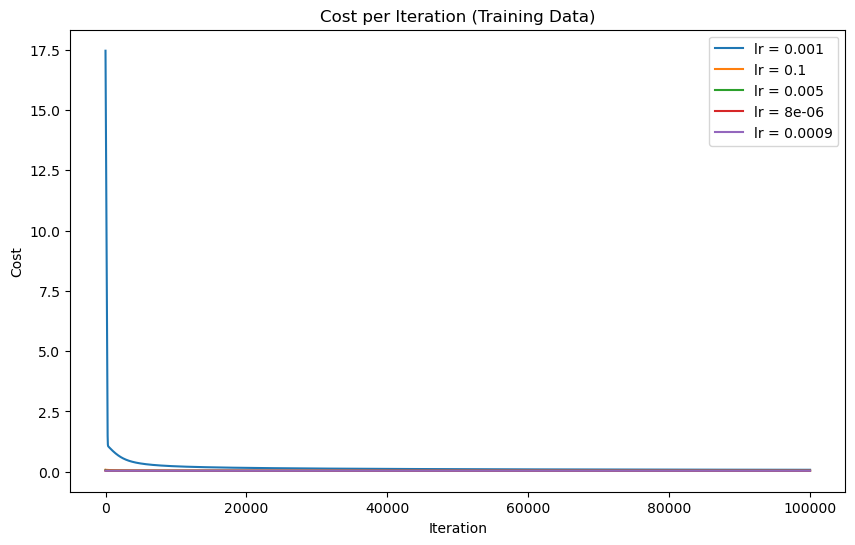

In [33]:
np.random.seed(0)
w = np.random.randn(x_train.shape[1])
b = np.random.randn()
lr = [0.001, 0.1, 0.005, 0.000008, 0.0009]

iterations = 100000

plt.figure(figsize=(10, 6))

for i, l in enumerate(lr):
    w_final, b_final, J_hist = gradientDescent(x_train, y_train, w, b, l, iterations)
    plt.plot(range(iterations), J_hist, label=f'lr = {l}', color=f'C{i}')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Training Data)')

plt.show()

In [34]:
y_train_predicted = np.dot(x_train, w_final) + b_final
y_predTr = [1 if x >= 0.5 else 0 for x in y_train_predicted]
df1 = pd.DataFrame({'Actual Price': y_train, 'Predicted Price':y_predTr})
df1.head()

,Actual Price,Predicted Price
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [35]:
mean_actual = np.mean(y_train)
sst = np.sum((y_train - mean_actual) ** 2)
# Calculate the sum of squared residuals (SSR)
ssr = np.sum((y_predTr - y_train) ** 2)
# Calculate R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared (Training Data): {r_squared:.3f}")

R-squared (Training Data): 0.930


# Evalvating Testing Data

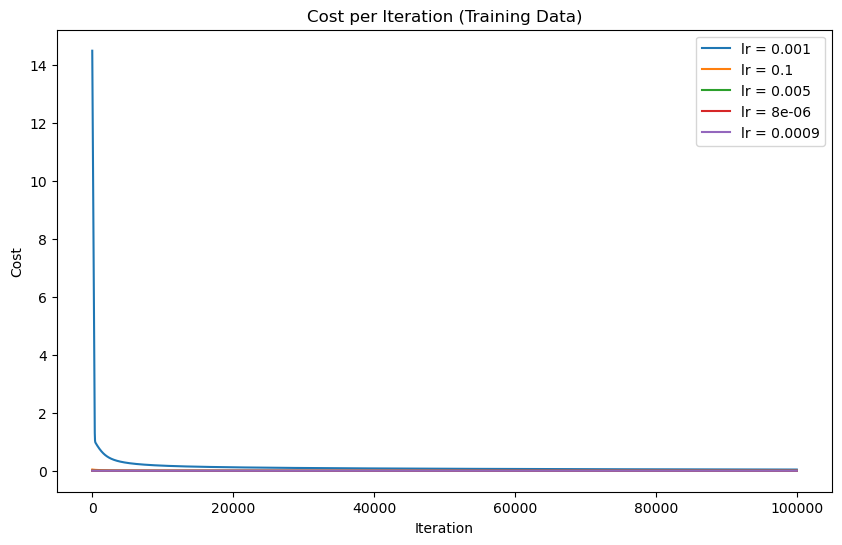

In [37]:
np.random.seed(0)
w = np.random.randn(x_train.shape[1])
b = np.random.randn()
lr = [0.001, 0.1, 0.005, 0.000008, 0.0009]

iterations = 100000

plt.figure(figsize=(10, 6))

for i, l in enumerate(lr):
    w_final, b_final, J_hist = gradientDescent(x_test, y_test, w, b, l, iterations)
    plt.plot(range(iterations), J_hist, label=f'lr = {l}', color=f'C{i}')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Training Data)')

plt.show()

In [40]:
y_test_predicted = np.dot(x_test, w_final) + b_final
y_predTest = [1 if x >= 0.5 else 0 for x in y_test_predicted]
df1 = pd.DataFrame({'Actual Price': y_test, 'Predicted Price':y_predTest})
df1.head()

,Actual Price,Predicted Price
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [41]:
mean_actual = np.mean(y_test)
sst = np.sum((y_test - mean_actual) ** 2)
# Calculate the sum of squared residuals (SSR)
ssr = np.sum((y_predTest - y_test) ** 2)
# Calculate R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared (Training Data): {r_squared:.3f}")

R-squared (Training Data): 1.000
